In [33]:
import numpy as np
import tensorflow as tf
from glob import glob
import cv2
from PIL import Image

In [66]:
train_files = glob('hymenoptera_data/train/*/*.jpg')
test_files = glob('hymenoptera_data/val/*/*.jpg')

In [67]:
train_files[:5]

['hymenoptera_data/train\\ants\\0013035.jpg',
 'hymenoptera_data/train\\ants\\1030023514_aad5c608f9.jpg',
 'hymenoptera_data/train\\ants\\1095476100_3906d8afde.jpg',
 'hymenoptera_data/train\\ants\\1099452230_d1949d3250.jpg',
 'hymenoptera_data/train\\ants\\116570827_e9c126745d.jpg']

In [74]:
import os
from random import shuffle
from tensorflow.keras.applications import vgg16

IMG_SIZE = (224, 224)  # размер входного изображения сети

# загружаем входное изображение и предобрабатываем
def load_image(path, target_size=IMG_SIZE):
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, target_size)
    return vgg16.preprocess_input(img)  # предобработка для VGG16

# функция-генератор загрузки обучающих данных с диска
def fit_generator(files, batch_size=32):
    batch_size = min(batch_size, len(files))
    while True:
        shuffle(files)
        for k in range(len(files) // batch_size):
#             i = k * batch_size
#             j = i + batch_size
#             if j > len(files):
#                 j = - j % len(files)
            x = np.array([load_image(path) for path in files])
            y = np.array([1. if 'ants' in path else 0.
                          for path in files])
            return (x, y)

# функция-генератор загрузки тестовых изображений с диска
def predict_generator(files):
    while True:
        for path in files:
            return np.array([load_image(path)])

In [76]:
xtrain, ytrain = fit_generator(train_files)
ytrain_labels = tf.keras.utils.to_categorical(ytrain)
print(xtrain.shape)
print(ytrain.shape)
print(ytrain_labels.shape)

(243, 224, 224, 3)
(243,)
(243, 2)


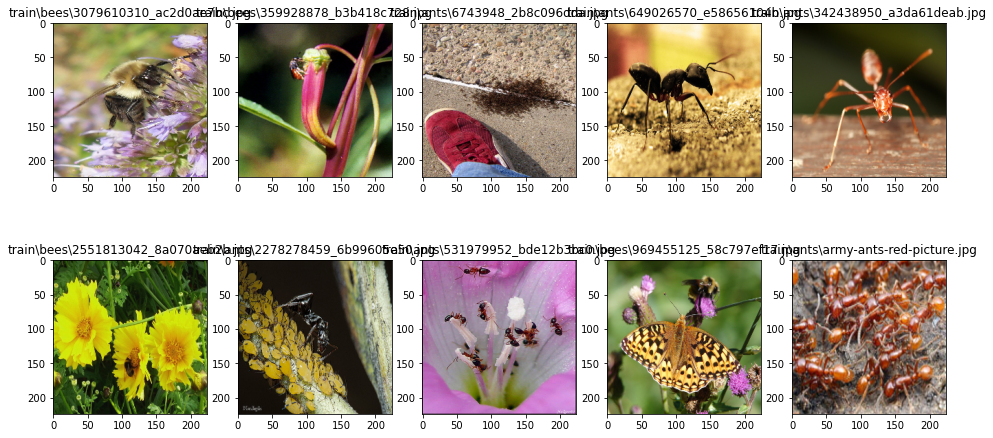

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 8))
for i, path in enumerate(train_files[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    subplot.set_title('%s' % path.split('/')[-1])
    img = cv2.imread(path)[...,::-1]
    img = cv2.resize(img, IMG_SIZE)
    plt.imshow(img)

In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=xtrain.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(filters=8, 
                        kernel_size=(5, 5),
                        padding='same',
                        activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')

    
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [140]:
model.fit(xtrain, 
          ytrain_labels,
          batch_size=32,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 20s 3s/step - loss: 542.7808 - accuracy: 0.4605 - val_loss: 170.4805 - val_accuracy: 0.4490
Epoch 2/10
7/7 [==============================] - 20s 3s/step - loss: 85.1180 - accuracy: 0.5904 - val_loss: 13.8651 - val_accuracy: 0.6122
Epoch 3/10
7/7 [==============================] - 19s 3s/step - loss: 12.6955 - accuracy: 0.5943 - val_loss: 3.6336 - val_accuracy: 0.6122
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 1.8648 - accuracy: 0.8065 - val_loss: 2.1417 - val_accuracy: 0.5510
Epoch 5/10
7/7 [==============================] - 19s 3s/step - loss: 0.4977 - accuracy: 0.9065 - val_loss: 2.0317 - val_accuracy: 0.6327
Epoch 6/10
7/7 [==============================] - 19s 3s/step - loss: 0.3000 - accuracy: 0.9347 - val_loss: 1.4823 - val_accuracy: 0.6531
Epoch 7/10
7/7 [==============================] - 19s 3s/step - loss: 0.1348 - accuracy: 0.9726 - val_loss: 1.1998 - val_accuracy: 0.6122
Epoch 8/10
7/7 [===========

In [145]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=xtrain.shape[1:], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=8, 
                        kernel_size=(5, 5),
                        padding='same',
                        activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')

    
])



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [146]:
model.fit(xtrain, 
          ytrain_labels,
          batch_size=32,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
7/7 [==============================] - 26s 4s/step - loss: 14.5240 - accuracy: 0.5254 - val_loss: 61.4336 - val_accuracy: 0.6327
Epoch 2/10
7/7 [==============================] - 25s 4s/step - loss: 9.7317 - accuracy: 0.7202 - val_loss: 89.7482 - val_accuracy: 0.5918
Epoch 3/10
7/7 [==============================] - 25s 4s/step - loss: 9.2689 - accuracy: 0.8476 - val_loss: 63.9852 - val_accuracy: 0.5510
Epoch 4/10
7/7 [==============================] - 25s 4s/step - loss: 3.8914 - accuracy: 0.8808 - val_loss: 41.3826 - val_accuracy: 0.5510
Epoch 5/10
7/7 [==============================] - 25s 3s/step - loss: 1.6235 - accuracy: 0.9596 - val_loss: 35.3247 - val_accuracy: 0.5306
Epoch 6/10
7/7 [==============================] - 25s 4s/step - loss: 1.0929 - accuracy: 0.9631 - val_loss: 32.1426 - val_accuracy: 0.4694
Epoch 7/10
7/7 [==============================] - 25s 3s/step - loss: 0.2489 - accuracy: 0.9880 - val_loss: 30.0835 - val_accuracy: 0.5510
Epoch 8/10
7/7 [==========

In [162]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train = train_generator.flow_from_directory('hymenoptera_data/train/', target_size=(224, 224), batch_size=32, class_mode='binary')
test = test_generator.flow_from_directory('hymenoptera_data/train/', target_size=(224, 224), batch_size=32, class_mode='binary')

Found 244 images belonging to 2 classes.
Found 244 images belonging to 2 classes.


In [165]:
ResNet = tf.keras.applications.ResNet50(
    include_top=True, weights=None, input_tensor=None,
    input_shape=None, pooling=None, classes=2
)

In [176]:
for layer in ResNet.layers:
    layer.trainable = False

x = ResNet.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=ResNet.input, outputs=x, name='insects')

In [177]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [180]:
model.fit(train,
          steps_per_epoch=7,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=test)

Epoch 1/10
7/7 [==============================] - 69s 11s/step - loss: 0.7297 - accuracy: 0.5472 - val_loss: 0.7039 - val_accuracy: 0.5861
Epoch 2/10
7/7 [==============================] - 70s 11s/step - loss: 0.7063 - accuracy: 0.5804 - val_loss: 0.6865 - val_accuracy: 0.7008
Epoch 3/10
7/7 [==============================] - 68s 11s/step - loss: 0.7322 - accuracy: 0.5896 - val_loss: 0.6951 - val_accuracy: 0.5574
Epoch 4/10
7/7 [==============================] - 69s 11s/step - loss: 0.7331 - accuracy: 0.5377 - val_loss: 0.6844 - val_accuracy: 0.6270
Epoch 5/10
7/7 [==============================] - 69s 11s/step - loss: 0.6941 - accuracy: 0.6321 - val_loss: 0.6761 - val_accuracy: 0.5984
Epoch 6/10
7/7 [==============================] - 69s 11s/step - loss: 0.6880 - accuracy: 0.6226 - val_loss: 0.6674 - val_accuracy: 0.7131
Epoch 7/10
7/7 [==============================] - 68s 11s/step - loss: 0.6726 - accuracy: 0.7075 - val_loss: 0.6643 - val_accuracy: 0.7295
Epoch 8/10
7/7 [===========

In [185]:
ResNet = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224,224,3), pooling=None, classes=2
)


In [186]:
for layer in ResNet.layers:
    layer.trainable = False

x = ResNet.layers[-5].output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1,  # один выход (бинарная классификация)
                          activation='sigmoid',  # функция активации  
                          kernel_regularizer=tf.keras.regularizers.l1(1e-4))(x)

model = tf.keras.Model(inputs=ResNet.input, outputs=x, name='insects')

In [187]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # функция потерь binary_crossentropy (log loss
              metrics=['accuracy'])

In [ ]:
model.fit(train,
          steps_per_epoch=7,  # число вызовов генератора за эпоху
          epochs=10,  # число эпох обучения
          validation_data=test)

Epoch 1/10
7/7 [==============================] - 74s 11s/step - loss: 1.0336 - accuracy: 0.4174 - val_loss: 0.7005 - val_accuracy: 0.5287
Epoch 2/10
7/7 [==============================] - 67s 10s/step - loss: 0.7263 - accuracy: 0.4838 - val_loss: 0.6812 - val_accuracy: 0.6230
Epoch 3/10
7/7 [==============================] - 67s 11s/step - loss: 0.6940 - accuracy: 0.4995 - val_loss: 0.6739 - val_accuracy: 0.5943
Epoch 4/10
7/7 [==============================] - 69s 11s/step - loss: 0.6802 - accuracy: 0.5456 - val_loss: 0.6974 - val_accuracy: 0.5328
Epoch 5/10
7/7 [==============================] - 70s 11s/step - loss: 0.6930 - accuracy: 0.5479 - val_loss: 0.6535 - val_accuracy: 0.6475
Epoch 6/10
7/7 [==============================] - 67s 10s/step - loss: 0.6476 - accuracy: 0.6476 - val_loss: 0.6670 - val_accuracy: 0.5574
Epoch 7/10
7/7 [==============================] - 66s 10s/step - loss: 0.6878 - accuracy: 0.5450 - val_loss: 0.6405 - val_accuracy: 0.6393
Epoch 8/10
7/7 [===========